###### 1. Read the dataset. 
###### 2. Distinguish the feature and target set and divide the data set into training and test sets.
###### 3. Normalize the train and test data.
###### 4. Initialize and build the model. Identify the points of improvement and implement the same. 
###### 5. Print the accuracy score and confusion matrix (5 points).

In [1]:
# Importing necessary librarary for reading the data set and calculation 
import pandas as pd  # Data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np

In [2]:
#load the churn dataset for preprocessing and training or testing.
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
# Show First 5rows in the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Show last 5rows in the dataset
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
# describe the how many rows and column are present in the dataset.
df.shape

(10000, 14)

In [6]:
# It describe the statistical properties of the numerical column in this dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Show the Inforamtion about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# It is for displaying the data type of each column in the data frame
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
# Checking the null value in dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# Delete the unecesary data into dataset it is no longer needed
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# show the current column in the dataset.
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
# for visualize and Distinguish the feature and target set
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# creating a histogram visualization of two sets of data, x and y,
def visualization(x, y, xlabel):
    # specifies the size of the figure to be 10 units wide and 5 units tall.
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['orange', 'blue'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

In [27]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

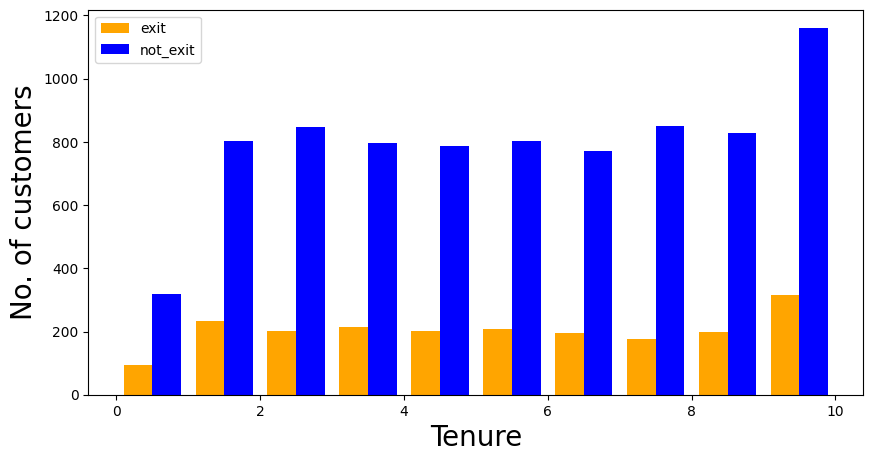

In [28]:
visualization(df_churn_exited, df_churn_not_exited, "Tenure")

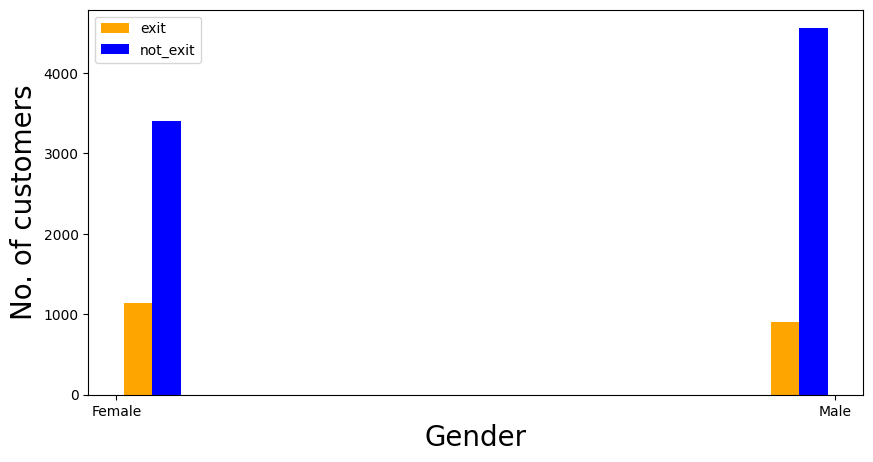

In [29]:
df_churn_exited = df[df['Exited']==1]['Gender']
df_churn_not_exited = df[df['Exited']==0]['Gender']
visualization(df_churn_exited, df_churn_not_exited, "Gender")

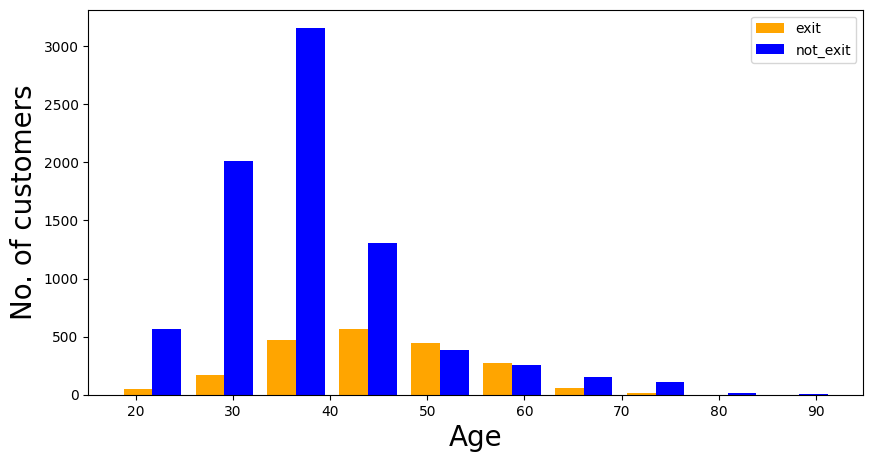

In [30]:
df_churn_exited = df[df['Exited']==1]['Age']
df_churn_not_exited = df[df['Exited']==0]['Age']
visualization(df_churn_exited, df_churn_not_exited, "Age")

In [31]:
#categorical data
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [32]:

df = pd.concat([df,gender,states], axis = 1)

###  Distinguish the feature and target set and divide the data set into training and test sets.

In [33]:
# store target column in x frame
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]
# store target column in y frame
y = df['Exited']

In [34]:
# Here we split the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [36]:
# standard scaling for better accuracy
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
X_train

array([[-0.92572521,  1.71049225, -1.74741698, ...,  0.91186722,
        -0.58372881, -0.57449099],
       [ 1.2279663 ,  0.19059751, -1.40178491, ...,  0.91186722,
        -0.58372881,  1.74067133],
       [-0.23530736, -1.13931038, -1.40178491, ...,  0.91186722,
        -0.58372881, -0.57449099],
       ...,
       [-0.99785842,  0.19059751, -1.40178491, ...,  0.91186722,
        -0.58372881, -0.57449099],
       [-0.79176354, -0.85433012,  0.32637542, ..., -1.09665089,
        -0.58372881, -0.57449099],
       [ 1.1352236 , -1.04431696, -1.40178491, ...,  0.91186722,
        -0.58372881,  1.74067133]])

In [38]:
X_test

array([[-0.66810661, -0.56934985,  1.01763956, ..., -1.09665089,
        -0.58372881,  1.74067133],
       [-0.0807362 ,  0.09560409, -1.40178491, ...,  0.91186722,
        -0.58372881, -0.57449099],
       [ 1.08369988, -0.09438275, -1.40178491, ..., -1.09665089,
         1.71312429, -0.57449099],
       ...,
       [ 1.28979476, -1.04431696,  1.36327163, ...,  0.91186722,
        -0.58372881, -0.57449099],
       [ 0.83638602, -1.32929722,  1.01763956, ...,  0.91186722,
        -0.58372881,  1.74067133],
       [-0.58566866,  0.47557778, -0.01925664, ...,  0.91186722,
        -0.58372881,  1.74067133]])

### 3. Initialize And build the model 

In [55]:
!pip install tensorflow -i https://pypi.org/simple --user



^C


In [56]:
from tensorflow.keras import Sequential #To create sequential neural network
from tensorflow.keras.layers import Dense #To create hidden layers


In [57]:
model = Sequential()
model.add(Dense(7,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [58]:
import tensorflow as tf

In [59]:
optimizer=tf.keras.optimizers.Adam(0.01)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [60]:
# fitting the model
model.fit(X_train,y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
700/700 [==============================] - 6s 4ms/step - loss: 0.4416 - accuracy: 0.8087
Epoch 2/100
700/700 [==============================] - 3s 5ms/step - loss: 0.3876 - accuracy: 0.8394
Epoch 3/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3638 - accuracy: 0.8476
Epoch 4/100
700/700 [==============================] - 3s 5ms/step - loss: 0.3511 - accuracy: 0.8543
Epoch 5/100
700/700 [==============================] - 3s 5ms/step - loss: 0.3473 - accuracy: 0.8597
Epoch 6/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3444 - accuracy: 0.8597
Epoch 7/100
700/700 [==============================] - 3s 5ms/step - loss: 0.3464 - accuracy: 0.8596
Epoch 8/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3419 - accuracy: 0.8599
Epoch 9/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3424 - accuracy: 0.8610
Epoch 10/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3419 - accura

In [61]:
# getting prediction output on x_test

y_pred_val=model.predict(X_test)
y_pred_val[y_pred_val>0.5]=1
y_pred_val[y_pred_val <0.5]=0

94/94 [==============================] - 1s 4ms/step


In [62]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_val=confusion_matrix(y_test,y_pred_val)
cm_val


array([[2277,  123],
       [ 315,  285]], dtype=int64)

In [63]:
# Accuracy score for model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_val)
print("Accuracy:", accuracy)


Accuracy: 0.854
